<a href="https://colab.research.google.com/github/x8BADF00D/edgeai_thermostat/blob/main/josh_thermostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Thermostat TF
references:
https://gist.github.com/ShawnHymel/79237fe6aee5a3653c497d879f746c0c
https://github.com/arduino/ArduinoTensorFlowLiteTutorials/


In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [ ]:
# print versions
!python --versions
print('Numpy ' + np.__version__)
print('Pandas ' + pd.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.19.5
Pandas 1.1.5
TensorFlow 2.4.1
Keras 2.4.0


In [ ]:
filename = "dataset_v1.1.csv"

df = pd.read_csv(filename)

# split features and labels
features = df.drop('Target Temperature', 1)
labels = df['Target Temperature']

In [ ]:
display(features, labels)

,Month,Day,Time of Day,Relative Humidity
0,1,0,0,30
1,1,0,1,30
2,1,0,2,30
3,1,0,3,30
4,1,0,4,30
...,...,...,...,...
6043,12,6,19,70
6044,12,6,20,70
6045,12,6,21,70
6046,12,6,22,70


0       60
1       60
2       60
3       60
4       60
        ..
6043    65
6044    65
6045    65
6046    65
6047    57
Name: Target Temperature, Length: 6048, dtype: int64

In [ ]:
inputs = []
outputs = []

inputs = np.array(features)
outputs = np.array(labels)

In [ ]:
print(inputs)
print(outputs)

[[ 1  0  0 30]
 [ 1  0  1 30]
 [ 1  0  2 30]
 ...
 [12  6 21 70]
 [12  6 22 70]
 [12  6 23 70]]
[60 60 60 ... 65 65 57]


In [ ]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Randomizing data since was ordered
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split data into training and testing sets
train_split = int(0.6 * num_inputs)
test_split = int(0.2 * num_inputs + train_split)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [train_split, test_split])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [train_split, test_split])

In [ ]:
print(inputs.shape)

(6048, 4)


In [ ]:
# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [ ]:
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
3628/3628 [==============================] - 5s 1ms/step - loss: 21.1397 - mae: 21.1397 - val_loss: 12.5168 - val_mae: 12.5168
Epoch 2/600
3628/3628 [==============================] - 5s 1ms/step - loss: 12.2603 - mae: 12.2603 - val_loss: 11.1992 - val_mae: 11.1992
Epoch 3/600
3628/3628 [==============================] - 5s 1ms/step - loss: 11.2085 - mae: 11.2085 - val_loss: 10.0514 - val_mae: 10.0514
Epoch 4/600
3628/3628 [==============================] - 5s 1ms/step - loss: 9.9899 - mae: 9.9899 - val_loss: 8.6405 - val_mae: 8.6405
Epoch 5/600
3628/3628 [==============================] - 5s 1ms/step - loss: 8.2772 - mae: 8.2772 - val_loss: 6.9065 - val_mae: 6.9065
Epoch 6/600
3628/3628 [==============================] - 5s 1ms/step - loss: 5.7328 - mae: 5.7328 - val_loss: 2.6193 - val_mae: 2.6193
Epoch 7/600
3628/3628 [==============================] - 5s 1ms/step - loss: 2.8378 - mae: 2.8378 - val_loss: 2.3135 - val_mae: 2.3135
Epoch 8/600
3628/3628 [====================

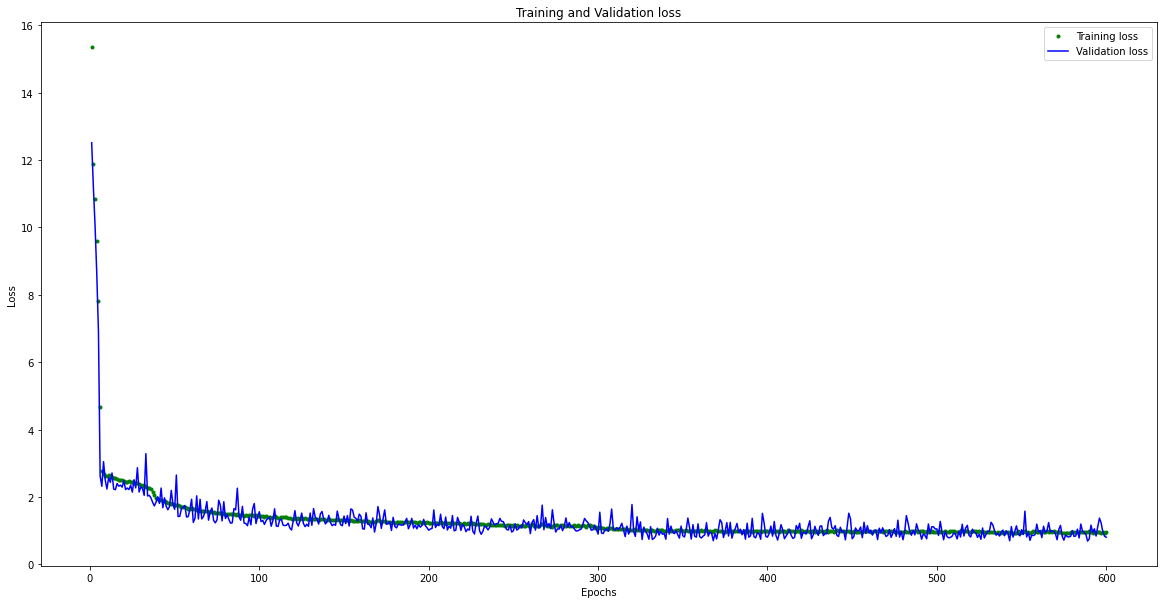

[20.0, 10.0]


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

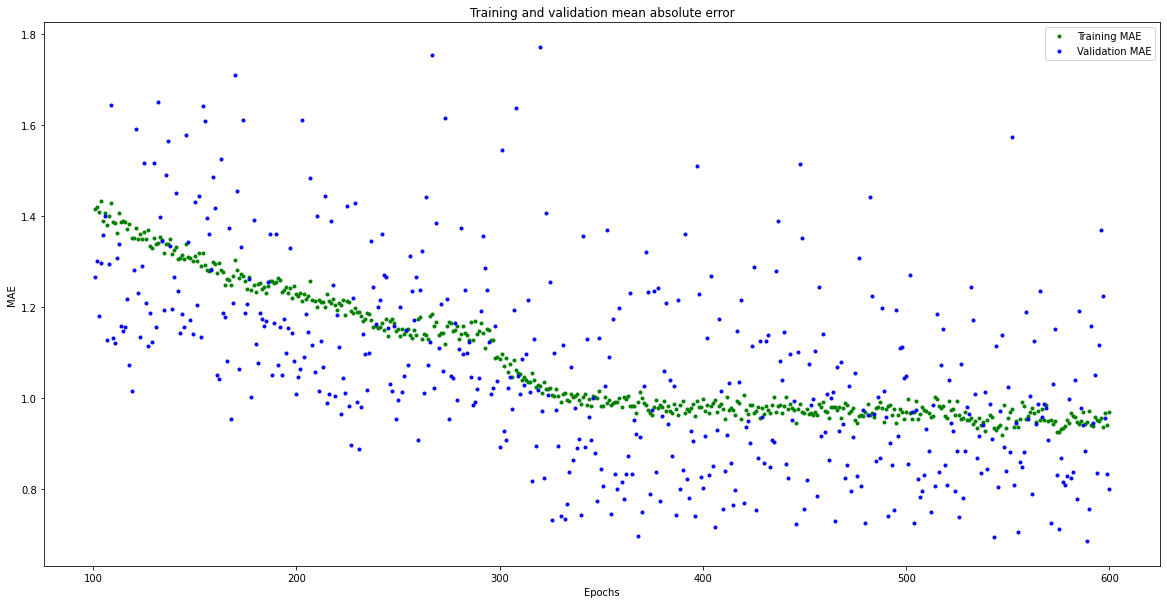

In [ ]:
# graph of mean absolute error
SKIP = 100
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

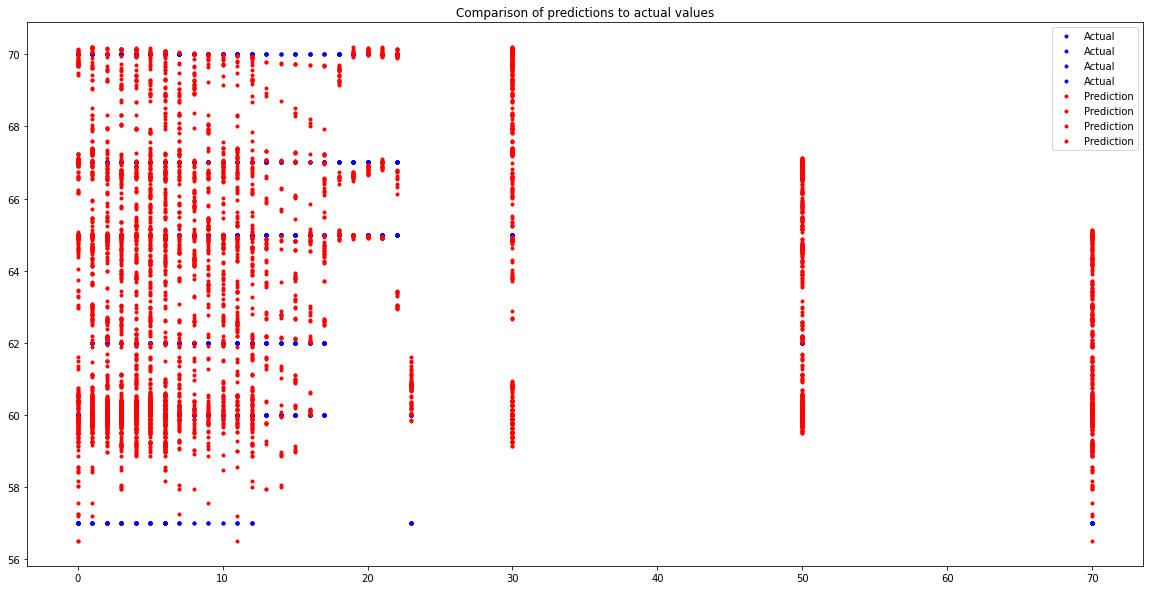

In [ ]:
predictions = model.predict(inputs_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [ ]:
#####################################################################
# Takes Keras model and converts it to TFL model for use on arduino #
#####################################################################

# Convert Keras Model to a tflite model
tflite_model_name = 'thermo_model'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp2zzqp7bq/assets


INFO:tensorflow:Assets written to: /tmp/tmp2zzqp7bq/assets


3152

In [ ]:
###################################################
# This section converts tflite model into C array #
###################################################

# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
###################################################
# Convert C array into .h file for use in arduino #
###################################################

# Write TFLite model to a C source (or header) file

c_model_name = 'thermo_model'

with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

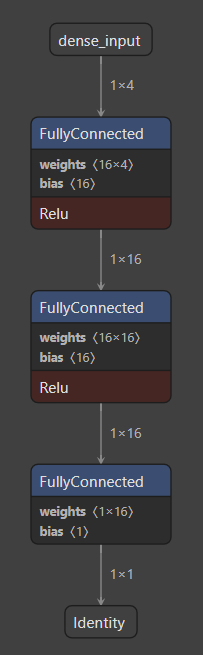